In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import missingno as msno
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
def prin_roc(model,X_test,X_train):

#  тест   
    try:
        preds = probs = model.predict_proba(X_test)[:,1]      
    except:
        preds = model.predict(X_test)       
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'test AUC = %0.2f' % roc_auc,color='red')

#     трайн
    try:
        preds = model.predict_proba(X_train)[:,1]
    except:
        preds = model.predict(X_train)  
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'train AUC = %0.2f' % roc_auc,color='green')

    plt.title('Receiver Operating Characteristic') 
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    

In [3]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Посмотрим наданные немного

In [4]:
train

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
179995        3166995        0        3958217           39.00         W   
179996        3166996        0        3958237           59.95         W   
179997        3166997        0        3958241           34.00         W   
179998        3166998        0        3958260           59.00         W   
179999        3166999        0        3958317          226.00         W   

        card1  card2  card3       card4  card5  ... V330  V331  V332  V333  \
0       13926    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   
1        2755  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   
2        4663  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   
3       18132  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   
4        4497  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   
...       ...    ...    ...         ...    ...  ...  ...   ...   ...   ...   
179995   1877  310.0  150.0  mastercard  224.0  ...  NaN   NaN   NaN   NaN   
179996  10075  514.0  150.0  mastercard  224.0  ...  NaN   NaN   NaN   NaN   
179997   6053  122.0  150.0  mastercard  195.0  ...  NaN   NaN   NaN   NaN   
179998   7726  555.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
179999  17480  528.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   

        V334 V335 V336  V337  V338  V339  
0        NaN  NaN  NaN   NaN   NaN   NaN  
1        NaN  NaN  NaN   NaN   NaN   NaN  
2        NaN  NaN  NaN   NaN   NaN   NaN  
3        NaN  NaN  NaN   NaN   NaN   NaN  
4        0.0  0.0  0.0   0.0   0.0   0.0  
...      ...  ...  ...   ...   ...   ...  
179995   NaN  NaN  NaN   NaN   NaN   NaN  
179996   NaN  NaN  NaN   NaN   NaN   NaN  
179997   NaN  NaN  NaN   NaN   NaN   NaN  
179998   NaN  NaN  NaN   NaN   NaN   NaN  
179999   NaN  NaN  NaN   NaN   NaN   NaN  

[180000 rows x 394 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 541.1+ MB


In [6]:
test

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             3287000        1        7415038         226.000         W   
1             3287001        0        7415054        3072.000         W   
2             3287002        0        7415081         319.950         W   
3             3287003        0        7415111         171.000         W   
4             3287004        0        7415112         107.950         W   
...               ...      ...            ...             ...       ...   
99996         3386996        0       10091528         368.990         W   
99997         3386997        0       10091533         445.330         W   
99998         3386998        0       10091544          15.226         C   
99999         3386999        0       10091549          34.742         C   
100000        3387000        0       10091550         312.450         W   

        card1  card2  card3       card4  card5  ... V330  V331  V332  V333  \
0       12473  555.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
1       15651  417.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
2       13844  583.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
3       11556  309.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
4       10985  555.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
...       ...    ...    ...         ...    ...  ...  ...   ...   ...   ...   
99996   13964  496.0  150.0  mastercard  224.0  ...  NaN   NaN   NaN   NaN   
99997   10616  583.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
99998    9803  583.0  150.0        visa  226.0  ...  NaN   NaN   NaN   NaN   
99999   16062  500.0  185.0  mastercard  137.0  ...  NaN   NaN   NaN   NaN   
100000  16632  215.0  150.0  mastercard  229.0  ...  NaN   NaN   NaN   NaN   

        V334 V335 V336  V337  V338  V339  
0        NaN  NaN  NaN   NaN   NaN   NaN  
1        NaN  NaN  NaN   NaN   NaN   NaN  
2        NaN  NaN  NaN   NaN   NaN   NaN  
3        NaN  NaN  NaN   NaN   NaN   NaN  
4        NaN  NaN  NaN   NaN   NaN   NaN  
...      ...  ...  ...   ...   ...   ...  
99996    NaN  NaN  NaN   NaN   NaN   NaN  
99997    NaN  NaN  NaN   NaN   NaN   NaN  
99998    NaN  NaN  NaN   NaN   NaN   NaN  
99999    NaN  NaN  NaN   NaN   NaN   NaN  
100000   NaN  NaN  NaN   NaN   NaN   NaN  

[100001 rows x 394 columns]

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 300.6+ MB


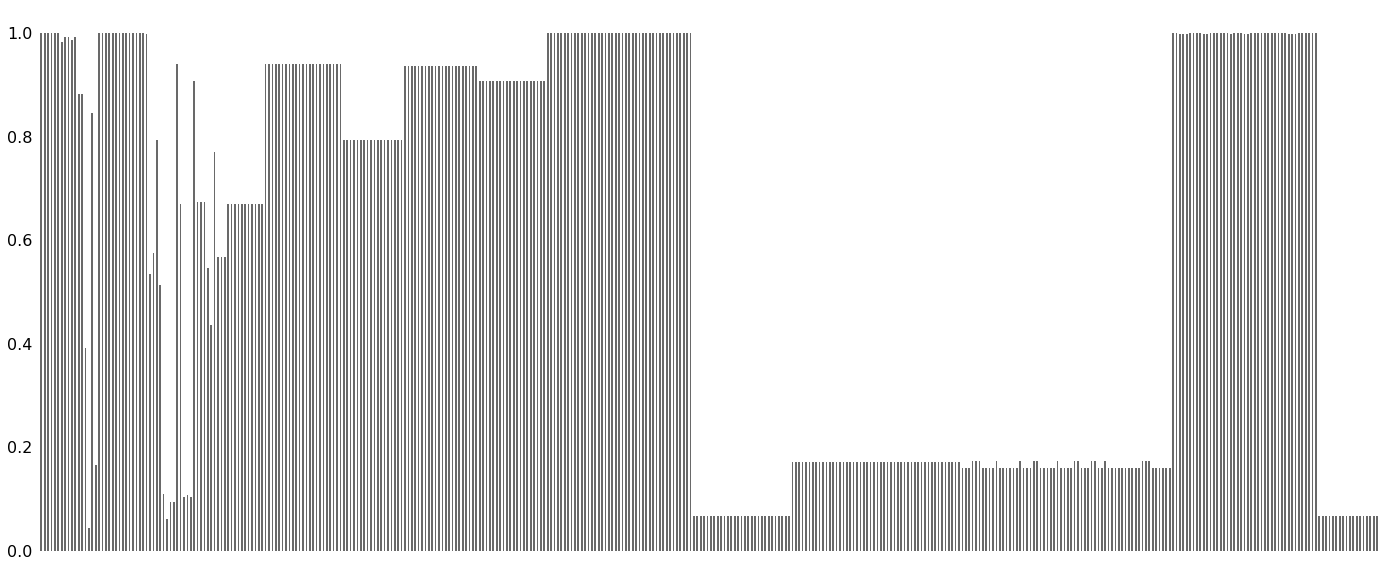

In [8]:
msno.bar(test, labels=False)

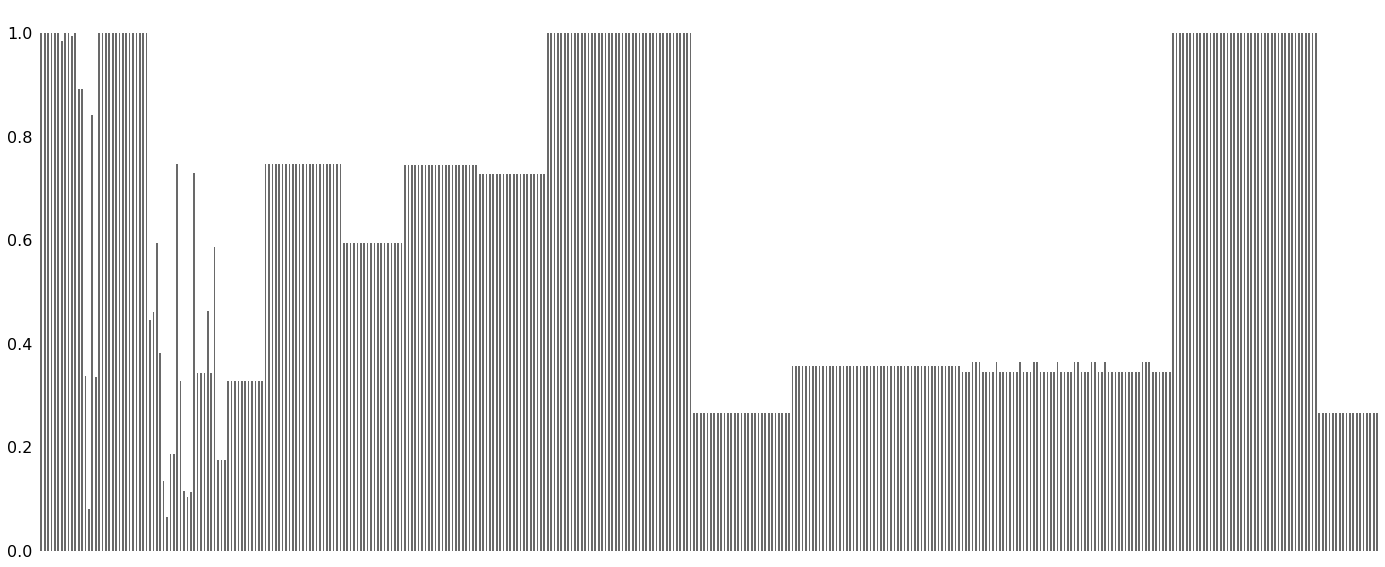

In [9]:
msno.bar(train, labels=False)

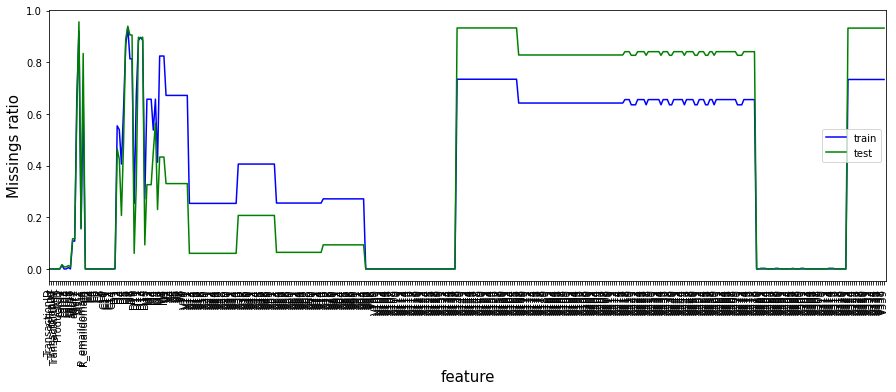

In [10]:
fig = plt.figure(figsize=(15, 5))
plt.plot(train.isnull().mean(), label="train", color="blue")
plt.plot(test.isnull().mean(), label="test", color="green")
plt.xticks(range(train.shape[1]), train.columns, rotation=90)
plt.ylabel("Missings ratio", size=15)
plt.xlabel("feature", size=15)
plt.xlim(0, train.shape[1])
plt.legend()

Очень много пропусков и они не совсем равномерные в тесте и трейне

In [11]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

НЕ числовые признаки в количесвте 14 едениц

In [12]:
# Выбирем числовые признаки
numerical_features = train.select_dtypes(include=[np.number]).columns
# уберем отуда таргет
numerical_features = numerical_features.drop('isFraud')
# создадим таргет
y_train = train['isFraud']
y_test = test['isFraud']


In [13]:
train[numerical_features]

TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
0             2987000          86400           68.50  13926    NaN  150.0   
1             2987001          86401           29.00   2755  404.0  150.0   
2             2987002          86469           59.00   4663  490.0  150.0   
3             2987003          86499           50.00  18132  567.0  150.0   
4             2987004          86506           50.00   4497  514.0  150.0   
...               ...            ...             ...    ...    ...    ...   
179995        3166995        3958217           39.00   1877  310.0  150.0   
179996        3166996        3958237           59.95  10075  514.0  150.0   
179997        3166997        3958241           34.00   6053  122.0  150.0   
179998        3166998        3958260           59.00   7726  555.0  150.0   
179999        3166999        3958317          226.00  17480  528.0  150.0   

        card5  addr1  addr2  dist1  ...  V330  V331  V332  V333  V334  V335  \
0       142.0  315.0   87.0   19.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1       102.0  325.0   87.0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2       166.0  330.0   87.0  287.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3       117.0  476.0   87.0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4       102.0  420.0   87.0    NaN  ...   0.0   0.0   0.0   0.0   0.0   0.0   
...       ...    ...    ...    ...  ...   ...   ...   ...   ...   ...   ...   
179995  224.0  272.0   87.0   12.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
179996  224.0  315.0   87.0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
179997  195.0  330.0   87.0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
179998  226.0  272.0   87.0    NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
179999  226.0  123.0   87.0    5.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   

        V336  V337  V338  V339  
0        NaN   NaN   NaN   NaN  
1        NaN   NaN   NaN   NaN  
2        NaN   NaN   NaN   NaN  
3        NaN   NaN   NaN   NaN  
4        0.0   0.0   0.0   0.0  
...      ...   ...   ...   ...  
179995   NaN   NaN   NaN   NaN  
179996   NaN   NaN   NaN   NaN  
179997   NaN   NaN   NaN   NaN  
179998   NaN   NaN   NaN   NaN  
179999   NaN   NaN   NaN   NaN  

[180000 rows x 379 columns]

посмотрим на целевую переменную

In [14]:
y_train.value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

In [15]:
print(f'положительный исход составляет {y_train.value_counts()[1]/y_train.value_counts().values.sum()*100} %')

положительный исход составляет 2.856111111111111 %


In [16]:
print('-'*100)

----------------------------------------------------------------------------------------------------


In [17]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "reg_lambda": 50,
    "max_depth": 6,
    "gamma": 4,
    "nthread": 14,
    "seed": 27
}

In [18]:
dtrain = xgb.DMatrix( data=train[numerical_features], label=y_train)
dvalid = xgb.DMatrix( data=test[numerical_features], label=y_test)

In [19]:
model_1 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=25,
    maximize=True,
)

[18:22:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.64424	valid-auc:0.63732
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 90 rounds.
[25]	train-auc:0.86968	valid-auc:0.84510
[50]	train-auc:0.90105	valid-auc:0.85421
[75]	train-auc:0.91708	valid-auc:0.85808
[100]	train-auc:0.92672	valid-auc:0.86186
[125]	train-auc:0.93138	valid-auc:0.86288
[150]	train-auc:0.93566	valid-auc:0.86372
[175]	train-auc:0.93904	valid-auc:0.86482
[200]	train-auc:0.94176	valid-auc:0.86380
[225]	train-auc:0.94360	valid-auc:0.86316
[250]	train-auc:0.94525	valid-auc:0.86356
Stopping. 

Cross-Validation на train

In [20]:
cv_result_1 = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=5,
)

[18:23:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:23:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:23:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in la

Как видно на крос валидации результаты гораздо выше, чем на тесте. 
Думаю это связано с заметной разнией в данных на тесте и трейне, как было видно выше

In [21]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

In [22]:
object_features = train.select_dtypes(include=[np.object]).columns

In [23]:
len(object_features)

14

In [24]:
list(object_features)

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [25]:
train[object_features]

ProductCD       card4   card6 P_emaildomain R_emaildomain   M1   M2  \
0              W    discover  credit           NaN           NaN    T    T   
1              W  mastercard  credit     gmail.com           NaN  NaN  NaN   
2              W        visa   debit   outlook.com           NaN    T    T   
3              W  mastercard   debit     yahoo.com           NaN  NaN  NaN   
4              H  mastercard  credit     gmail.com           NaN  NaN  NaN   
...          ...         ...     ...           ...           ...  ...  ...   
179995         W  mastercard   debit     gmail.com           NaN    T    T   
179996         W  mastercard   debit     yahoo.com           NaN  NaN  NaN   
179997         W  mastercard   debit     gmail.com           NaN    T    T   
179998         W        visa   debit           NaN           NaN  NaN  NaN   
179999         W        visa  credit     gmail.com           NaN    T    T   

         M3   M4   M5   M6   M7   M8   M9  
0         T   M2    F    T  NaN  NaN  NaN  
1       NaN   M0    T    T  NaN  NaN  NaN  
2         T   M0    F    F    F    F    F  
3       NaN   M0    T    F  NaN  NaN  NaN  
4       NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...     ...  ...  ...  ...  ...  ...  ...  
179995    F   M1    T    F  NaN  NaN  NaN  
179996  NaN  NaN  NaN    T  NaN  NaN  NaN  
179997    T   M0    T    F  NaN  NaN  NaN  
179998  NaN   M1    T    T  NaN  NaN  NaN  
179999    T   M0    F    T  NaN  NaN  NaN  

[180000 rows x 14 columns]

Заменим категории на цифры в виде доли положительного таргета

In [26]:
D={}
for i in object_features:
    d={}
    value_counts=train[i].value_counts()
    for j in value_counts.index:
        d[j]=round(train[train[i]==j]['isFraud'].sum()/value_counts[j],10)*100
    D[i]=d    

In [27]:
D

{'ProductCD': {'W': 1.8542686199999998,
  'H': 2.54660601,
  'R': 1.69661589,
  'C': 9.32422452,
  'S': 3.6184210500000002},
 'card4': {'visa': 2.73384336,
  'mastercard': 3.1999412900000004,
  'american express': 1.53590702,
  'discover': 3.6585365899999998},
 'card6': {'debit': 2.11330715,
  'credit': 4.44704608,
  'debit or credit': 0.0,
  'charge card': 0.0},
 'P_emaildomain': {'gmail.com': 3.94952231,
  'yahoo.com': 1.54870309,
  'hotmail.com': 4.78815248,
  'anonymous.com': 1.1329531800000001,
  'aol.com': 1.51462193,
  'comcast.net': 0.61728395,
  'icloud.com': 3.3989266499999995,
  'outlook.com': 7.3450134799999995,
  'msn.com': 1.40548138,
  'att.net': 0.65412919,
  'sbcglobal.net': 0.18315018,
  'verizon.net': 0.20597321999999998,
  'live.com': 2.79642058,
  'bellsouth.net': 0.56100982,
  'ymail.com': 1.68195719,
  'me.com': 1.12179487,
  'cox.net': 0.52631579,
  'yahoo.com.mx': 0.9578544099999999,
  'charter.net': 0.2688172,
  'optonline.net': 1.10497238,
  'live.com.mx': 1.

Переобозначим признаки

In [28]:
train_1=train.copy()
test_1 = test.copy()


In [29]:
for i in D:
    train_1[i] = train_1[i].map(D[i])
    test_1[i] = test_1[i].map(D[i])
    
    

In [30]:
train_1[object_features]

ProductCD     card4     card6  P_emaildomain  R_emaildomain        M1  \
0        1.854269  3.658537  4.447046            NaN            NaN  1.706938   
1        1.854269  3.199941  4.447046       3.949522            NaN       NaN   
2        1.854269  2.733843  2.113307       7.345013            NaN  1.706938   
3        1.854269  3.199941  2.113307       1.548703            NaN       NaN   
4        2.546606  3.199941  4.447046       3.949522            NaN       NaN   
...           ...       ...       ...            ...            ...       ...   
179995   1.854269  3.199941  2.113307       3.949522            NaN  1.706938   
179996   1.854269  3.199941  2.113307       1.548703            NaN       NaN   
179997   1.854269  3.199941  2.113307       3.949522            NaN  1.706938   
179998   1.854269  2.733843  2.113307            NaN            NaN       NaN   
179999   1.854269  2.733843  4.447046       3.949522            NaN  1.706938   

              M2        M3        M4        M5        M6        M7        M8  \
0       1.480497  1.308561  9.234645  2.010974  1.360530       NaN       NaN   
1            NaN       NaN  3.484355  4.015889  1.360530       NaN       NaN   
2       1.480497  1.308561  3.484355  2.010974  2.364596  1.430784  1.544363   
3            NaN       NaN  3.484355  4.015889  2.364596       NaN       NaN   
4            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...          ...       ...       ...       ...       ...       ...       ...   
179995  1.480497  3.179674  2.151019  4.015889  2.364596       NaN       NaN   
179996       NaN       NaN       NaN       NaN  1.360530       NaN       NaN   
179997  1.480497  1.308561  3.484355  4.015889  2.364596       NaN       NaN   
179998       NaN       NaN  2.151019  4.015889  1.360530       NaN       NaN   
179999  1.480497  1.308561  3.484355  2.010974  1.360530       NaN       NaN   

              M9  
0            NaN  
1            NaN  
2       1.986331  
3            NaN  
4            NaN  
...          ...  
179995       NaN  
179996       NaN  
179997       NaN  
179998       NaN  
179999       NaN  

[180000 rows x 14 columns]

In [31]:
test_1[object_features]

ProductCD     card4     card6  P_emaildomain  R_emaildomain        M1  \
0        1.854269  2.733843  4.447046       1.514622            NaN  1.706938   
1        1.854269  2.733843  2.113307       1.548703            NaN       NaN   
2        1.854269  2.733843  4.447046       3.949522            NaN  1.706938   
3        1.854269  2.733843  2.113307       1.132953            NaN  1.706938   
4        1.854269  2.733843  2.113307       1.132953            NaN  1.706938   
...           ...       ...       ...            ...            ...       ...   
99996    1.854269  3.199941  2.113307       1.548703            NaN  1.706938   
99997    1.854269  2.733843  4.447046       3.949522            NaN       NaN   
99998    9.324225  2.733843  4.447046       3.949522         7.4298       NaN   
99999    9.324225  3.199941  4.447046       3.949522         7.4298       NaN   
100000   1.854269  3.199941  2.113307       3.949522            NaN  1.706938   

              M2        M3        M4        M5        M6        M7        M8  \
0       1.480497  3.179674  3.484355  4.015889  2.364596  1.430784  1.544363   
1            NaN       NaN       NaN       NaN  1.360530       NaN       NaN   
2       1.480497  1.308561       NaN       NaN  1.360530  1.430784  1.544363   
3       1.480497  1.308561  3.484355  4.015889  1.360530  1.430784  1.064369   
4       1.480497  1.308561       NaN       NaN  1.360530  0.970446  1.064369   
...          ...       ...       ...       ...       ...       ...       ...   
99996   1.480497  1.308561       NaN       NaN  2.364596  1.430784  1.544363   
99997        NaN       NaN       NaN       NaN  1.360530       NaN       NaN   
99998        NaN       NaN  9.234645       NaN       NaN       NaN       NaN   
99999        NaN       NaN  9.234645       NaN       NaN       NaN       NaN   
100000  1.480497  1.308561       NaN       NaN  1.360530  1.430784  1.544363   

              M9  
0       1.256952  
1            NaN  
2       1.256952  
3       1.256952  
4       1.256952  
...          ...  
99996   1.256952  
99997        NaN  
99998        NaN  
99999        NaN  
100000  1.256952  

[100001 rows x 14 columns]

In [32]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Columns: 394 entries, TransactionID to V339
dtypes: float64(390), int64(4)
memory usage: 300.6 MB


In [33]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Columns: 394 entries, TransactionID to V339
dtypes: float64(390), int64(4)
memory usage: 541.1 MB


In [34]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 10000,
    "reg_lambda": 50,
    "max_depth": 10,
    "gamma": 4,
    "nthread": 14,
    "seed": 27
}

In [35]:
dtrain = xgb.DMatrix( data=train_1[numerical_features.append(object_features)], label=y_train)
dvalid = xgb.DMatrix( data=test_1[numerical_features.append(object_features)], label=y_test)

In [36]:
model_2 = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=25,
    maximize=True,
)

[18:28:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.65533	valid-auc:0.64541
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 90 rounds.
[25]	train-auc:0.88438	valid-auc:0.85215
[50]	train-auc:0.92858	valid-auc:0.86491
[75]	train-auc:0.94591	valid-auc:0.87032
[100]	train-auc:0.95524	valid-auc:0.87456
[125]	train-auc:0.95981	valid-auc:0.87534
[150]	train-auc:0.96361	valid-auc:0.87483
[175]	train-auc:0.96620	valid-auc:0.87442
[200]	train-auc:0.96759	valid-auc:0.87372
Stopping. Best iteration:
[123]	train-auc:0.95940	valid-auc:0.87540



In [37]:
cv_result_2 = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=10000,
    early_stopping_rounds=90,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=5,
)

[18:29:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in la

In [38]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [39]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.05,
    "n_estimators": 20000,
    "n_jobs": 14,
    "seed": 27
}

In [40]:
dtrain = lgb.Dataset(data=train[numerical_features], label=y_train)
dvalid = lgb.Dataset(data=test[numerical_features], label=y_test)

In [41]:
model_3 = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=90,
    verbose_eval=25
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 90 rounds
[25]	training's auc: 0.89688	valid_1's auc: 0.854865
[50]	training's auc: 0.916063	valid_1's auc: 0.854353
[75]	training's auc: 0.930774	valid_1's auc: 0.855532
[100]	training's auc: 0.942597	valid_1's auc: 0.858704
[125]	training's auc: 0.949542	valid_1's auc: 0.860503
[150]	training's auc: 0.95539	valid_1's auc: 0.861762
[175]	training's auc: 0.960788	valid_1's auc: 0.862149
[200]	training's auc: 0.964793	valid_1's auc: 0.862612
[225]	training's auc: 0.967462	valid_1's auc: 0.861568
[250]	training's auc: 0.970705	valid_1's auc: 0.861545
[275]	training's auc: 0.973073	valid_1's auc: 0.861072
Early stopping, best iteration is:
[198]	training's auc: 0.964588	valid_1's auc: 0.862687


Cross-Validation

In [42]:
cv_result_3 = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    categorical_feature="auto",
    early_stopping_rounds=90,
    verbose_eval=25,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[25]	cv_agg's auc: 0.887968 + 0.00232058
[50]	cv_agg's auc: 0.902633 + 0.00160847
[75]	cv_agg's auc: 0.912954 + 0.00129753
[100]	cv_agg's auc: 0.919966 + 0.00142979
[125]	cv_agg's auc: 0.92444 + 0.0013705
[150]	cv_agg's auc: 0.928394 + 0.0018789
[175]	cv_agg's auc: 0.931182 + 0.00199366
[200]	cv_agg's auc: 0.933586 + 0.00207415
[225]	cv_agg's auc: 0.935408 + 0.00218673
[250]	cv_agg's auc: 0.936935 + 0.00223302
[275]	cv_agg's auc: 0.938607 + 0.00244827
[300]	cv_agg's auc: 0.940046 + 0.00240382
[325]	cv_agg's auc: 0.941004 + 0.00242749
[350]	cv_agg's auc: 0.941889 + 0.00259047
[375]	cv_agg's auc: 0.942692 + 0.00249497
[400]	cv_agg's auc: 0.943322 + 0.00247135
[425]	cv_agg's auc: 0.944101 + 0.00251004
[450]	cv_agg's auc: 0.944901 + 0.00256841
[475]	cv_agg's auc: 0.945454 + 0.00248537
[500]	cv_agg's auc: 0.946186 + 0.00262338
[525]	cv_agg's auc: 0.946783 + 0.00272769
[550]	cv_agg's auc: 0.94761 + 0.00257229
[575]	cv_agg's auc: 0.948265 + 0.00260833
[600]	cv_agg's auc: 0.948564 + 0.00273035

In [43]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [44]:
dtrain = lgb.Dataset(data=train_1[numerical_features.append(object_features)], label=y_train)
dvalid = lgb.Dataset(data=test_1[numerical_features.append(object_features)], label=y_test)

In [45]:
model_4 = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=90,
    verbose_eval=25
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 90 rounds
[25]	training's auc: 0.904579	valid_1's auc: 0.858306
[50]	training's auc: 0.926996	valid_1's auc: 0.8655
[75]	training's auc: 0.941577	valid_1's auc: 0.868426
[100]	training's auc: 0.95211	valid_1's auc: 0.872167
[125]	training's auc: 0.957999	valid_1's auc: 0.87289
[150]	training's auc: 0.964004	valid_1's auc: 0.873272
[175]	training's auc: 0.968215	valid_1's auc: 0.874396
[200]	training's auc: 0.972286	valid_1's auc: 0.873815
[225]	training's auc: 0.976163	valid_1's auc: 0.874918
[250]	training's auc: 0.978269	valid_1's auc: 0.874258
[275]	training's auc: 0.980176	valid_1's auc: 0.873654
[300]	training's auc: 0.982153	valid_1's auc: 0.872632
Early stopping, best iteration is:
[222]	training's auc: 0.975783	valid_1's auc: 0.875016


In [46]:
cv_result_4 = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    categorical_feature="auto",
    early_stopping_rounds=20,
    verbose_eval=25,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[25]	cv_agg's auc: 0.897001 + 0.00335553
[50]	cv_agg's auc: 0.911956 + 0.00253547
[75]	cv_agg's auc: 0.922504 + 0.00288995
[100]	cv_agg's auc: 0.929352 + 0.00206344
[125]	cv_agg's auc: 0.933986 + 0.00190232
[150]	cv_agg's auc: 0.937394 + 0.00290319
[175]	cv_agg's auc: 0.939556 + 0.00266776
[200]	cv_agg's auc: 0.941267 + 0.00270203
[225]	cv_agg's auc: 0.943047 + 0.00268675
[250]	cv_agg's auc: 0.944561 + 0.00264054
[275]	cv_agg's auc: 0.945962 + 0.00239827
[300]	cv_agg's auc: 0.946931 + 0.00230737
[325]	cv_agg's auc: 0.948116 + 0.00225853
[350]	cv_agg's auc: 0.949329 + 0.00207751
[375]	cv_agg's auc: 0.950252 + 0.00188787
[400]	cv_agg's auc: 0.950963 + 0.00200541
[425]	cv_agg's auc: 0.951635 + 0.00212033
[450]	cv_agg's auc: 0.952243 + 0.00227703
[475]	cv_agg's auc: 0.952801 + 0.00225641
[500]	cv_agg's auc: 0.953236 + 0.00230942
[525]	cv_agg's auc: 0.95376 + 0.00253187
[550]	cv_agg's auc: 0.954286 + 0.00258196
[575]	cv_agg's auc: 0.954788 + 0.00261535
[600]	cv_agg's auc: 0.955128 + 0.00269

In [47]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [48]:
train[object_features]= train[object_features].astype('category')
test[object_features]= test[object_features].astype('category')

In [49]:
dtrain = lgb.Dataset(data=train[numerical_features.append(object_features)], label=y_train,categorical_feature=object_features.to_list())
dvalid = lgb.Dataset(data=test[numerical_features.append(object_features)], label=y_test,categorical_feature=object_features.to_list())

In [50]:
params = {
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.05,
    "n_estimators": 20000,
    "n_jobs": 14,
    "seed": 27
}

In [51]:
model_5 = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature=object_features.to_list(),
    early_stopping_rounds=90,
    verbose_eval=25
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 90 rounds
[25]	training's auc: 0.903957	valid_1's auc: 0.856424
[50]	training's auc: 0.924345	valid_1's auc: 0.862946
[75]	training's auc: 0.94088	valid_1's auc: 0.866729
[100]	training's auc: 0.952401	valid_1's auc: 0.872332
[125]	training's auc: 0.95946	valid_1's auc: 0.872575
[150]	training's auc: 0.964462	valid_1's auc: 0.872549
[175]	training's auc: 0.968845	valid_1's auc: 0.872638
[200]	training's auc: 0.972633	valid_1's auc: 0.872574
[225]	training's auc: 0.9758	valid_1's auc: 0.872205
[250]	training's auc: 0.97829	valid_1's auc: 0.872005
Early stopping, best iteration is:
[163]	training's auc: 0.966668	valid_1's auc: 0.872697


In [52]:
cv_result_5 = lgb.cv(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    categorical_feature=object_features.to_list(),
    early_stopping_rounds=20,
    verbose_eval=25,
    stratified=True,
    shuffle=True,
    nfold=5, 
)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:502: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[25]	cv_agg's auc: 0.894947 + 0.00231434
[50]	cv_agg's auc: 0.910909 + 0.00183798
[75]	cv_agg's auc: 0.92127 + 0.00134117
[100]	cv_agg's auc: 0.927197 + 0.00123197
[125]	cv_agg's auc: 0.932176 + 0.00207828
[150]	cv_agg's auc: 0.935906 + 0.00204952
[175]	cv_agg's auc: 0.938784 + 0.00256756
[200]	cv_agg's auc: 0.941475 + 0.0031131
[225]	cv_agg's auc: 0.943096 + 0.00360998
[250]	cv_agg's auc: 0.94459 + 0.00354294
[275]	cv_agg's auc: 0.946178 + 0.00337133
[300]	cv_agg's auc: 0.947285 + 0.00332512
[325]	cv_agg's auc: 0.948465 + 0.00371334
[350]	cv_agg's auc: 0.949217 + 0.00386237
[375]	cv_agg's auc: 0.949888 + 0.0037318
[400]	cv_agg's auc: 0.950477 + 0.0038212
[425]	cv_agg's auc: 0.950941 + 0.00382926
[450]	cv_agg's auc: 0.951804 + 0.00370446
[475]	cv_agg's auc: 0.952496 + 0.00380004
[500]	cv_agg's auc: 0.953092 + 0.00356462
[525]	cv_agg's auc: 0.953581 + 0.00337091
[550]	cv_agg's auc: 0.953943 + 0.00335654
[575]	cv_agg's auc: 0.954299 + 0.00335849
[600]	cv_agg's auc: 0.954701 + 0.00349805


Как видно на тесте и на крос валидации автопреобразование сработало хуже

In [53]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [54]:
cb_params = {
    "n_estimators": 1000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 50,
    "max_depth": 12,
    "l2_leaf_reg": 20,
    "early_stopping_rounds": 90,
    "thread_count": 14,
    "random_seed": 42,
    'custom_metric':  ['AUC', 'Logloss']
}

In [55]:
train_pool = cb.Pool(train[numerical_features], y_train)
valid_pool = cb.Pool(test[numerical_features], y_test)

In [56]:
model_6 = cb.CatBoostClassifier(**cb_params)
model_6.fit(train_pool, eval_set=valid_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6786937	best: 0.6786937 (0)	total: 457ms	remaining: 7m 36s
50:	test: 0.8413605	best: 0.8433392 (43)	total: 15.7s	remaining: 4m 52s
100:	test: 0.8490055	best: 0.8490055 (100)	total: 31.4s	remaining: 4m 39s
150:	test: 0.8573409	best: 0.8573409 (150)	total: 47.2s	remaining: 4m 25s
200:	test: 0.8592894	best: 0.8593899 (199)	total: 1m 3s	remaining: 4m 10s
250:	test: 0.8603402	best: 0.8603402 (250)	total: 1m 18s	remaining: 3m 55s
300:	test: 0.8609204	best: 0.8612123 (278)	total: 1m 33s	remaining: 3m 37s
350:	test: 0.8605880	best: 0.8612123 (278)	total: 1m 48s	remaining: 3m 20s
Stopped by overfitting detector  (90 iterations wait)

bestTest = 0.8612123281
bestIteration = 278

Shrink model to first 279 iterations.


In [57]:
cv_result_6 = cb.cv(
    train_pool,
    cb_params,
    plot=True,
    fold_count=5
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6937826	best: 0.6937826 (0)	total: 1.58s	remaining: 26m 15s
50:	test: 0.8686528	best: 0.8686528 (50)	total: 1m 15s	remaining: 23m 18s
100:	test: 0.8866884	best: 0.8866884 (100)	total: 2m 32s	remaining: 22m 39s
150:	test: 0.8972710	best: 0.8972710 (150)	total: 3m 51s	remaining: 21m 44s
200:	test: 0.9032772	best: 0.9032772 (200)	total: 5m 13s	remaining: 20m 44s
250:	test: 0.9069619	best: 0.9069619 (250)	total: 6m 32s	remaining: 19m 30s
300:	test: 0.9091148	best: 0.9091148 (300)	total: 7m 47s	remaining: 18m 5s
350:	test: 0.9113744	best: 0.9113744 (350)	total: 9m 7s	remaining: 16m 52s
400:	test: 0.9143549	best: 0.9143549 (400)	total: 10m 31s	remaining: 15m 42s
450:	test: 0.9166976	best: 0.9166976 (450)	total: 11m 58s	remaining: 14m 34s
500:	test: 0.9183988	best: 0.9183988 (500)	total: 13m 23s	remaining: 13m 20s
550:	test: 0.9196820	best: 0.9196820 (550)	total: 14m 54s	remaining: 12m 8s
600:	test: 0.9209734	best: 0.9209734 (600)	total: 16m 29s	remaining: 10m 56s
650:	test: 0.9223

In [58]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

In [59]:
train_pool = cb.Pool(train_1[numerical_features.append(object_features)], y_train)
valid_pool = cb.Pool(test_1[numerical_features.append(object_features)], y_test)

In [60]:
model_7 = cb.CatBoostClassifier(**cb_params)
model_7.fit(train_pool, eval_set=valid_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6949307	best: 0.6949307 (0)	total: 331ms	remaining: 5m 30s
50:	test: 0.8520456	best: 0.8521907 (49)	total: 16.9s	remaining: 5m 14s
100:	test: 0.8572429	best: 0.8572429 (100)	total: 33.6s	remaining: 4m 59s
150:	test: 0.8618299	best: 0.8619834 (149)	total: 50.5s	remaining: 4m 43s
200:	test: 0.8662599	best: 0.8662599 (200)	total: 1m 7s	remaining: 4m 27s
250:	test: 0.8685453	best: 0.8685453 (250)	total: 1m 24s	remaining: 4m 11s
300:	test: 0.8694271	best: 0.8694488 (297)	total: 1m 40s	remaining: 3m 54s
350:	test: 0.8699723	best: 0.8700893 (338)	total: 1m 56s	remaining: 3m 34s
400:	test: 0.8703689	best: 0.8703925 (397)	total: 2m 11s	remaining: 3m 15s
450:	test: 0.8713846	best: 0.8713846 (450)	total: 2m 27s	remaining: 2m 59s
500:	test: 0.8719391	best: 0.8719767 (497)	total: 2m 44s	remaining: 2m 43s
550:	test: 0.8731954	best: 0.8731954 (550)	total: 3m 1s	remaining: 2m 27s
600:	test: 0.8740354	best: 0.8741175 (585)	total: 3m 18s	remaining: 2m 11s
650:	test: 0.8740548	best: 0.8741175 

In [61]:
cv_result_7 = cb.cv(
    train_pool,
    cb_params,
    plot=True,
    fold_count=5
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.7383615	best: 0.7383615 (0)	total: 1.66s	remaining: 27m 36s
50:	test: 0.8779076	best: 0.8779076 (50)	total: 1m 21s	remaining: 25m 17s
100:	test: 0.8957773	best: 0.8957773 (100)	total: 2m 45s	remaining: 24m 37s
150:	test: 0.9069481	best: 0.9069481 (150)	total: 4m 12s	remaining: 23m 39s
200:	test: 0.9141597	best: 0.9141597 (200)	total: 5m 40s	remaining: 22m 31s
250:	test: 0.9185955	best: 0.9185955 (250)	total: 7m 8s	remaining: 21m 18s
300:	test: 0.9215210	best: 0.9215210 (300)	total: 8m 35s	remaining: 19m 58s
350:	test: 0.9234421	best: 0.9234421 (350)	total: 9m 59s	remaining: 18m 29s
400:	test: 0.9255975	best: 0.9255975 (400)	total: 11m 30s	remaining: 17m 10s
450:	test: 0.9279183	best: 0.9279183 (450)	total: 13m 4s	remaining: 15m 55s
500:	test: 0.9294326	best: 0.9294326 (500)	total: 14m 35s	remaining: 14m 32s
550:	test: 0.9305851	best: 0.9305851 (550)	total: 16m 12s	remaining: 13m 12s
600:	test: 0.9316448	best: 0.9316448 (600)	total: 17m 55s	remaining: 11m 53s
650:	test: 0.932

In [62]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [63]:
train[object_features] = train[object_features].astype(str)
test[object_features] = test[object_features].astype(str)

In [64]:
train_pool = cb.Pool(train[numerical_features.append(object_features)], y_train,cat_features=object_features.to_list())
valid_pool = cb.Pool(test[numerical_features.append(object_features)], y_test,cat_features=object_features.to_list())

In [65]:
model_8 = cb.CatBoostClassifier(**cb_params)
model_8.fit(train_pool, eval_set=valid_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6748865	best: 0.6748865 (0)	total: 833ms	remaining: 13m 52s
50:	test: 0.8497185	best: 0.8507161 (48)	total: 41s	remaining: 12m 43s
100:	test: 0.8573544	best: 0.8574908 (99)	total: 1m 21s	remaining: 12m 8s
150:	test: 0.8624716	best: 0.8625979 (148)	total: 2m 3s	remaining: 11m 34s
200:	test: 0.8662463	best: 0.8662463 (200)	total: 2m 45s	remaining: 10m 57s
250:	test: 0.8692055	best: 0.8692055 (250)	total: 3m 27s	remaining: 10m 20s
300:	test: 0.8711497	best: 0.8712197 (297)	total: 4m 6s	remaining: 9m 32s
350:	test: 0.8713756	best: 0.8713817 (347)	total: 4m 38s	remaining: 8m 35s
400:	test: 0.8717697	best: 0.8717939 (396)	total: 5m 11s	remaining: 7m 45s
450:	test: 0.8724539	best: 0.8725097 (443)	total: 5m 52s	remaining: 7m 9s
500:	test: 0.8730156	best: 0.8730168 (499)	total: 6m 34s	remaining: 6m 33s
550:	test: 0.8731767	best: 0.8731767 (550)	total: 7m 13s	remaining: 5m 53s
600:	test: 0.8735755	best: 0.8735755 (600)	total: 7m 56s	remaining: 5m 16s
650:	test: 0.8733843	best: 0.87362

In [66]:
cv_result_8 = cb.cv(
    train_pool,
    cb_params,
    plot=True,
    fold_count=5
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6797916	best: 0.6797916 (0)	total: 4.2s	remaining: 1h 9m 57s
50:	test: 0.8715366	best: 0.8715366 (50)	total: 3m 33s	remaining: 1h 6m 7s
100:	test: 0.8932192	best: 0.8932192 (100)	total: 7m 24s	remaining: 1h 5m 53s
150:	test: 0.9045042	best: 0.9045042 (150)	total: 11m 24s	remaining: 1h 4m 5s
200:	test: 0.9110505	best: 0.9110505 (200)	total: 15m 32s	remaining: 1h 1m 45s
250:	test: 0.9156096	best: 0.9156096 (250)	total: 19m 41s	remaining: 58m 45s
300:	test: 0.9184341	best: 0.9184341 (300)	total: 23m 32s	remaining: 54m 40s
350:	test: 0.9203560	best: 0.9203560 (350)	total: 27m	remaining: 49m 56s
400:	test: 0.9222528	best: 0.9222528 (400)	total: 30m 49s	remaining: 46m 3s
450:	test: 0.9247214	best: 0.9247214 (450)	total: 35m 22s	remaining: 43m 4s
500:	test: 0.9261233	best: 0.9261233 (500)	total: 40m	remaining: 39m 50s
550:	test: 0.9273488	best: 0.9273488 (550)	total: 44m 44s	remaining: 36m 27s
600:	test: 0.9282807	best: 0.9282807 (600)	total: 49m 36s	remaining: 32m 56s
650:	test: 0

Все равно ручная обработка категореальных переменных дала лучшие результаты, хотя здесь автоматическая обработка более приближена к ручной

In [67]:
print('-'*100)

----------------------------------------------------------------------------------------------------


Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

1 модель:
    1. XGBoost
    2. Числовые данные

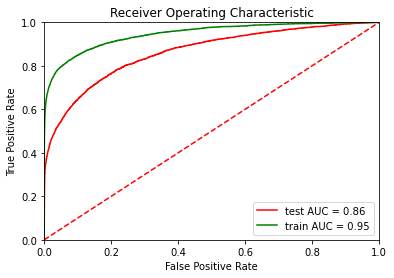

In [68]:
X_train = xgb.DMatrix( data=train[numerical_features], label=y_train)
X_test = xgb.DMatrix( data=test[numerical_features], label=y_test)
prin_roc(model_1,X_test,X_train)

2 модель:
    1. XGBoost
    2. Числовые данные + категории

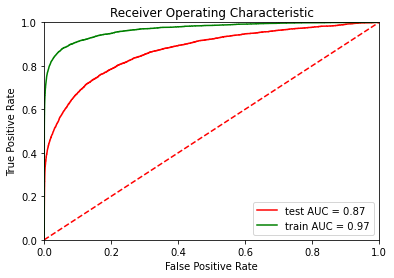

In [69]:
X_train = xgb.DMatrix( data=train_1[numerical_features.append(object_features)], label=y_train)
X_test = xgb.DMatrix( data=test_1[numerical_features.append(object_features)], label=y_test)
prin_roc(model_2,X_test,X_train)

3 модель:

1. LightGBM
2. Числовые данные

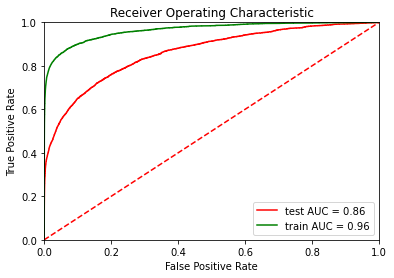

In [70]:
X_train = train[numerical_features]
X_test= test[numerical_features]
prin_roc(model_3,X_test,X_train)

4 модель:

1. LightGBM
2. Числовые данные + категории

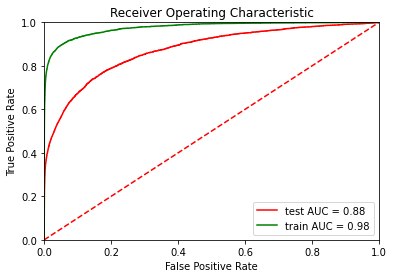

In [71]:
X_train = train_1[numerical_features.append(object_features)]
X_test= test_1[numerical_features.append(object_features)]
prin_roc(model_4,X_test,X_train)

5 модель:

1. CatBoost
2. Числовые данные

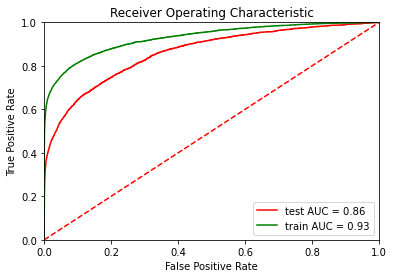

In [72]:
X_train = train[numerical_features]
X_test= test[numerical_features]
prin_roc(model_6,X_test,X_train)

6 модель:

1. CatBoost
2. Числовые данные + категории

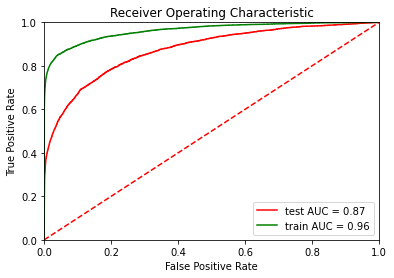

In [73]:
X_train = train_1[numerical_features.append(object_features)]
X_test= test_1[numerical_features.append(object_features)]
prin_roc(model_7,X_test,X_train)

У всех примерно одинаковые показатели, переобучение думаю связно с сильными различиями в тестовых и обучающих данных

In [74]:
print('-'*100)

----------------------------------------------------------------------------------------------------
